In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

%matplotlib inline

In [3]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


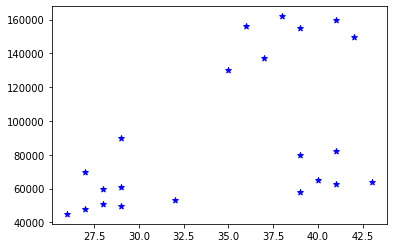

In [6]:
plt.scatter(df['Age'] , df['Income($)'] , color="blue" , marker='*')

In [8]:
model = KMeans(n_clusters=3)
model

KMeans(n_clusters=3)

In [9]:
yPredicted = model.fit_predict(df[['Age','Income($)']])
yPredicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [11]:
df['cluster'] = yPredicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [13]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

Text(0, 0.5, 'Income ($)')

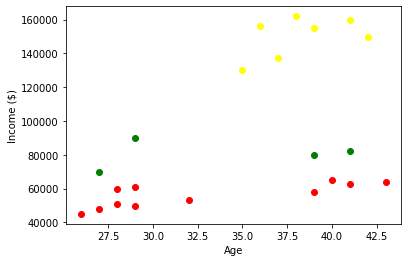

In [19]:
plt.scatter(df1.Age,df1['Income($)'] , color="green")
plt.scatter(df2.Age,df2['Income($)'] , color="yellow")
plt.scatter(df3.Age,df3['Income($)'] , color="red")

plt.xlabel("Age")
plt.ylabel("Income ($)")

In [26]:
#The Above happens because of scaling 120000 to 40 ... not grouped correcyly

scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [28]:
model = KMeans(n_clusters=3)
predict = model.fit_predict(df[['Age','Income($)']])
predict

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [39]:
model.cluster_centers_ #Centroids

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

In [40]:
df['cluster'] = predict
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

Text(0, 0.5, 'Income ($)')

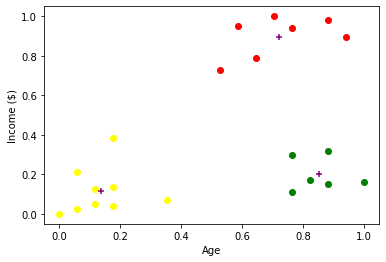

In [41]:
plt.scatter(df1.Age,df1['Income($)'] , color="green")
plt.scatter(df2.Age,df2['Income($)'] , color="yellow")
plt.scatter(df3.Age,df3['Income($)'] , color="red")

#Outputing the centroids
plt.scatter(model.cluster_centers_[:,0] , model.cluster_centers_[:,1] , color="purple" , marker="+" , label="centroid")

plt.xlabel("Age")
plt.ylabel("Income ($)")

In [46]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [47]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.34910470944195643,
 0.2766936276300278,
 0.22020960864009398,
 0.16858512236029757,
 0.13976844995388155,
 0.11190781744710704]

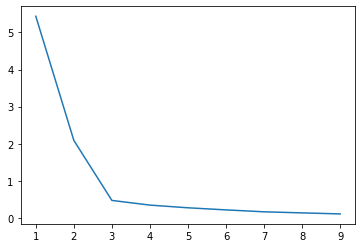

In [48]:
plt.plot(k_rng , sse)